In [ ]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install qiskit[visualization]
!pip install matplotlib
token = ""#introducir el código que se obtenga en la aplicación de IBM
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
  token=token, # Your token is confidential.

  instance="" #introducir el código de la instancia,
  name="", # Introducir el tu cuenta de IBM
  set_as_default=True,
)

In [ ]:
import qiskit
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
import matplotlib
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.primitives import BitArray
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

In [ ]:
#f3(a,b,c)=a xor b xor c
circb3 = QuantumCircuit(4)
circb3.cx(0,3)
circb3.cx(1,3)
circb3.cx(2,3)
circb3.draw()
gateb3 = circb3.to_gate(label='U_f=b3')

djb3 = QuantumCircuit(4,3)
djb3.x(3)
djb3.h(range(4))
djb3.append(gateb3, [0,1,2,3], [])
djb3.h([0,1,2])
djb3.measure([0,1,2],[0,1,2])
isa_circuitb3 = pm.run(djb3)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb3])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0rletumu1ms73d4met0


In [ ]:
print(isa_circuitb3.depth())
operaciones=isa_circuitb3.count_ops()
print(operaciones)

10
OrderedDict([('rz', 14), ('sx', 7), ('cz', 3), ('measure', 3), ('x', 1)])


PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-05-28 18:35:37', stop='2025-05-28 18:35:42', size=4096>)])}, 'version': 2})


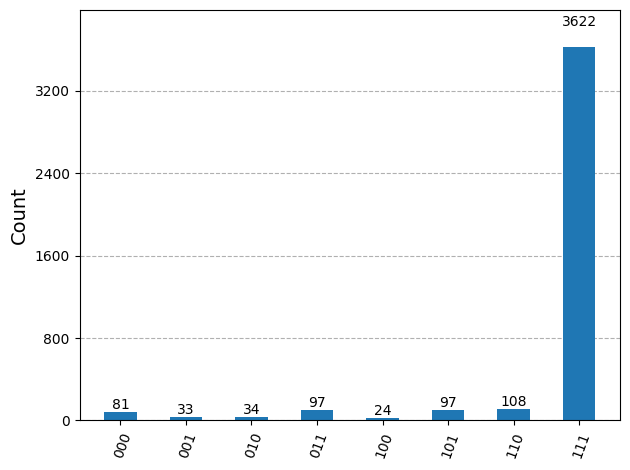

In [ ]:
from qiskit.visualization import plot_histogram
result = job.result()
print(result)
plot_histogram(result[0].data.c.get_counts())

In [ ]:
#f4(a,b,c,d)= a xor b xor c xor d
circb4 = QuantumCircuit(5)
circb4.cx(0,4)
circb4.cx(1,4)
circb4.cx(2,4)
circb4.cx(3,4)
gateb4 = circb4.to_gate(label='U_f=b4')

# Circuito Deutsch–Jozsa
djb4 = QuantumCircuit(5,4)
djb4.x(4)                   # prepara ancilla en |–>
djb4.h(range(5))            # Hadamards en todos los qubits
djb4.append(gateb4, [0,1,2,3,4], [])
djb4.h([0,1,2,3])           # segundo bloque de Hadamards en los de entrada
djb4.measure([0,1,2,3],     # mide sólo los 4 qubits de entrada
                 [0,1,2,3])
isa_circuitb4 = pm.run(djb4)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb4])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0rlin7p51os73av63b0


In [ ]:
#f5(a,b,c,d,e) = a xor b xor c xor d xor e
circb5 = QuantumCircuit(6)
for i in range(5):
    circb5.cx(i,5)
gateb5 = circb5.to_gate(label='U_f=b5')

djb5 = QuantumCircuit(6,5)
djb5.x(5)
djb5.h(range(6))
djb5.append(gateb5, list(range(6)), [])
djb5.h([0,1,2,3,4])
djb5.measure([0,1,2,3,4],[0,1,2,3,4])
isa_circuitb5 = pm.run(djb5)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb5])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0rll17p51os73av65i0


In [ ]:
#f7(a1,a2,...,a7)
circb7 = QuantumCircuit(8)
for i in range(7):
    circb7.cx(i, 7)
gateb7 = circb7.to_gate(label='U_f=b7')

# Deutsch–Jozsa de 7 bits
djb7 = QuantumCircuit(8, 7)
djb7.x(7)                 # ancilla en |–>
djb7.h(range(8))          # Hadamard en 7 inputs + ancilla
djb7.append(gateb7, list(range(8)), [])
djb7.h(list(range(7)))    # Hadamard solo en qubits de entrada
djb7.measure(list(range(7)), list(range(7)))
isa_circuitb7 = pm.run(djb7)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb7])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0rlqqfp51os73av6big


In [ ]:
# f9(a1,a2,...,a9)
circb9 = QuantumCircuit(10)
for i in range(9):
    circb9.cx(i, 9)
gateb9 = circb9.to_gate(label='U_f=b9')

# Deutsch–Jozsa de 9 bits
djb9 = QuantumCircuit(10, 9)
djb9.x(9)
djb9.h(range(10))
djb9.append(gateb9, list(range(10)), [])
djb9.h(list(range(9)))
djb9.measure(list(range(9)), list(range(9)))
isa_circuitb9 = pm.run(djb9)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb9])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0rlrtvp51os73av6cm0


In [ ]:
#f20(a1,a2,...,a20)
circb20 = QuantumCircuit(21)
for i in range(20):
    circb20.cx(i, 20)
gateb20 = circb20.to_gate(label='U_f=b20')

# Deutsch–Jozsa de 20 bits
djb20 = QuantumCircuit(21, 20)
djb20.x(20)                # prepara la ancilla en |–>
djb20.h(range(21))         # Hadamards en los 20 inputs + ancilla
djb20.append(gateb20, list(range(21)), [])
djb20.h(list(range(20)))   # Hadamards sólo en los qubits de entrada
djb20.measure(list(range(20)), list(range(20)))

isa_circuitb20 = pm.run(djb20)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb20])
result = job.result()


print(f">>> Job ID: {job.job_id()}")

In [ ]:
#f40(a1,a2,...,a40)
circb40 = QuantumCircuit(41)
for i in range(40):
    circb40.cx(i, 40)
gateb40 = circb40.to_gate(label='U_f=b40')

# Deutsch–Jozsa de 40 bits
djb40 = QuantumCircuit(41, 40)
djb40.x(40)                 # prepara la ancilla en |–>
djb40.h(range(41))          # Hadamards en los 40 inputs + ancilla
djb40.append(gateb40, list(range(41)), [])
djb40.h(list(range(40)))    # Hadamards sólo en los qubits de entrada
djb40.measure(list(range(40)), list(range(40)))

isa_circuitb40 = pm.run(djb40)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitb40])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d0s36qq4p3dc73f1urjg


In [ ]:
circ_Nejec=[(isa_circuitb3,"d0rletumu1ms73d4met0","f3"),(isa_circuitb4,"d0rlin7p51os73av63b0","f4"),(isa_circuitb5,"d0rll17p51os73av65i0","f5"),(isa_circuitb7,"d0rlqqfp51os73av6big","f7"),(isa_circuitb9,"d0rlrtvp51os73av6cm0","f9"),(isa_circuitb20,"d0rnq587m9ds739ff110","f20"),(isa_circuitb40,"d0s36qq4p3dc73f1urjg","f40")]

In [ ]:
import pandas as pd
propiedades=[]
for i in circ_Nejec:
  profundidad=i[0].depth()
  operaciones=i[0].count_ops()
  job_id=i[1]
  job=service.job(job_id)
  result = job.result()
  cero=len(list(result[0].data.c.get_counts().keys())[0])*'0'
  tasa_ceros=result[0].data.c.get_counts()[cero]*100/4096
  spans = job.result().metadata["execution"]["execution_spans"]
  segundos_ejecucion= spans.duration
  propiedades.append({"funcion":i[2],"profundidad":profundidad,"% de ceros":tasa_ceros,"segundos de ejecucion":segundos_ejecucion})



In [ ]:
job=service.job("d0rletumu1ms73d4met0")
result = job.result()
cero=len(list(result[0].data.c.get_counts().keys())[0])*'0'
tasa_ceros=result[0].data.c.get_counts()[cero]*100/4096
spans = job.result().metadata["execution"]["execution_spans"]
segundos_ejecucion= spans.duration

In [ ]:
segundos_ejecucion

5.411265

In [ ]:
tabla=pd.DataFrame(propiedades)
tabla.set_index("funcion", inplace=True)
tabla


,profundidad,% de ceros,segundos de ejecucion
funcion,,,
f3,10,1.977539,5.411265
f4,28,1.416016,2.354531
f5,37,0.903320,2.437476
f7,51,1.147461,2.237045
f9,79,1.782227,2.339252
f20,166,0.244141,2.378809
f40,365,0.024414,2.479570


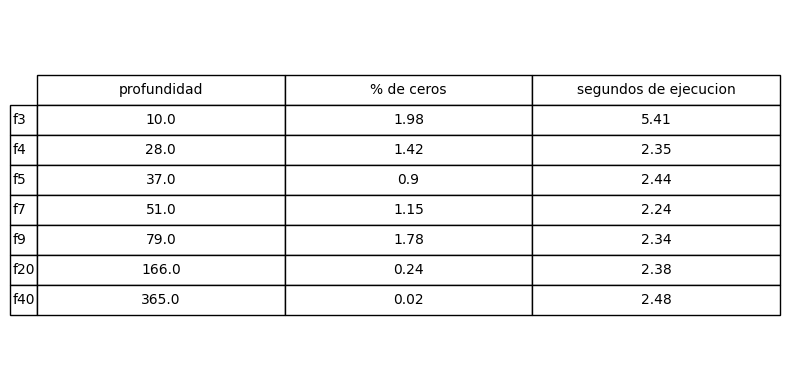

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# ejes ocultos
ax.axis('off')
ax.axis('tight')

# Crea tabla
table = ax.table(cellText=tabla.round(2).values,
                 colLabels=tabla.columns,
                 rowLabels=tabla.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
